In [15]:
import os 
import sys
import pandas as pd 
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

%run /home/melissa/PROJECT_DIRECTORIES/EEGFeatureExtraction/Scripts/Power/power_band_class.py

os.chdir('/home/melissa/PROJECT_DIRECTORIES/EEGFeatureExtraction/Scripts/Preprocessing/')
%run load_files.py
%run filter.py
%run exploratory.py
%run constants.py

## Power - Frequency Bands

In [5]:
frequency_names = ['delta', 'theta', 'sigma', 'beta', 'gamma']
frequency_bands = [[1, 5], [5, 11], [11, 16], [16, 30], [30, 48]]

In [101]:
analysis_ls = ['S7068']
for animal in analysis_ls:
    print('loading ' + str(animal))
    animal = str(animal)
    load_files = LoadFiles(directory_path, animal)
    data_loaded = []
    
    # Load data based on the group the animal belongs to
    if animal in SYNGAP_2_ID_ls:
        data_1, data_2, brain_state_1, brain_state_2 = load_files.load_two_analysis_files(start_times_dict=SYNGAP_baseline_start,
                                                                                          end_times_dict=SYNGAP_baseline_end)
        data_loaded.extend([(data_1, brain_state_1), (data_2, brain_state_2)])
    elif animal in SYNGAP_1_ID_ls:
        data_1, brain_state_1 = load_files.load_one_analysis_file(start_times_dict=SYNGAP_baseline_start,
                                                                  end_times_dict=SYNGAP_baseline_end)
        data_loaded.append((data_1, brain_state_1))
    
    print('data loaded')
        
    freq_power = []
    for freq_name, freq_band in zip(frequency_names, frequency_bands):
        for data, brain_state in data_loaded:
            #if you want to calculate power for all brain states (rem, nrem, wake), make all_brain_states = True
            br_idx, br_values = load_files.choose_indices(brain_state, all_brain_states=True)
            noise_filter = NoiseFilter(data, brain_state_file=brain_state, channelvariables=channel_variables,
                                       ch_type='eeg')
            bandpass_filtered_data = noise_filter.filter_data_type()
            power_calc = PowerBands(freq_low=freq_band[0], freq_high=freq_band[1], fs=250.4, nperseg=1252)
            #select channel numbers - can include a for loop here to calculate
            power_array = power_calc.calculate_power_average(bandpass_filtered_data,clean_indices = br_idx,
                                                     br_values = br_values,animal = animal,
                                                     frequency = freq_name, all_channels = False, channel = 2)
            freq_power.append(power_array)

loading S7068
data loaded


In [102]:
freq_concat = pd.concat(freq_power)

In [103]:
freq_concat 

,Power,Channel,Idx,Brainstate,Animal_ID,Frequency
0,35.735638,2,11,0,S7068,delta
1,29.700220,2,28,0,S7068,delta
2,21.803248,2,29,0,S7068,delta
3,29.359234,2,31,0,S7068,delta
4,27.138967,2,34,0,S7068,delta
...,...,...,...,...,...,...
10094,0.923495,2,17264,0,S7068,gamma
10095,1.540547,2,17270,0,S7068,gamma
10096,1.684891,2,17274,0,S7068,gamma
10097,1.617880,2,17276,0,S7068,gamma


## Overall (1 - 48)

In [12]:
frequency_names = ['overall']
frequency_bands = [[1, 48]]

In [13]:
channel_indices = list(range(0,14))
channel_indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [ ]:
all_animals_ls = []
for animal in analysis_ls:
    print('loading ' + str(animal))
    animal = str(animal)
    load_files = LoadFiles(directory_path, animal)
    data_loaded = []
    
    # Load data based on the group the animal belongs to
    if animal in SYNGAP_2_ID_ls:
        data_1, data_2, brain_state_1, brain_state_2 = load_files.load_two_analysis_files(start_times_dict=SYNGAP_baseline_start,
                                                                                          end_times_dict=SYNGAP_baseline_end)
        data_loaded.extend([(data_1, brain_state_1), (data_2, brain_state_2)])
    elif animal in SYNGAP_1_ID_ls:
        data_1, brain_state_1 = load_files.load_one_analysis_file(start_times_dict=SYNGAP_baseline_start,
                                                                  end_times_dict=SYNGAP_baseline_end)
        data_loaded.append((data_1, brain_state_1))
    
    print('data loaded')
        
    power_ls = []
    for freq_name, freq_band in zip(frequency_names, frequency_bands):
        for data, brain_state in data_loaded:
            #if you want to calculate power for all brain states (rem, nrem, wake), make all_brain_states = True
            br_idx, br_values = load_files.choose_indices(brain_state, all_brain_states=True)
            noise_filter = NoiseFilter(data, brain_state_file=brain_state, channelvariables=channel_variables,
                                       ch_type='eeg')
            bandpass_filtered_data = noise_filter.filter_data_type()
            power_calc = PowerBands(freq_low=freq_band[0], freq_high=freq_band[1], fs=250.4, nperseg=1252)
            #select channel numbers - can include a for loop here to calculate
            for chan in channel_indices:
                power_array, frequency = power_calc.average_psd_overall(data_array = bandpass_filtered_data[chan], clean_indices = br_idx)
                power_chan_df = pd.DataFrame({'Power': power_array, 'Frequency': frequency, 
                                              'Channel': [chan]*len(power_array), 'Animal': [animal]*len(power_array)})
                power_ls.append(power_chan_df)
    
    power_df = pd.concat(power_ls)
    print(power_df)
    all_animals_ls.append(power_df)

loading S7088
data loaded
            Power  Frequency  Channel Animal
0    1.147663e+00        0.0        0  S7088
1    4.940609e-01        0.2        0  S7088
2    1.398286e-01        0.4        0  S7088
3    2.974438e+00        0.6        0  S7088
4    2.529488e+01        0.8        0  S7088
..            ...        ...      ...    ...
622  1.799119e-14      124.4       13  S7088
623  1.786391e-14      124.6       13  S7088
624  1.777306e-14      124.8       13  S7088
625  1.771882e-14      125.0       13  S7088
626  8.850374e-15      125.2       13  S7088

[8778 rows x 4 columns]
loading S7092
data loaded
            Power  Frequency  Channel Animal
0    1.371936e+00        0.0        0  S7092
1    5.948361e-01        0.2        0  S7092
2    1.639377e-01        0.4        0  S7092
3    2.066977e+00        0.6        0  S7092
4    1.441820e+01        0.8        0  S7092
..            ...        ...      ...    ...
622  1.190151e-14      124.4       13  S7092
623  1.181905e-14      

In [ ]:
## for average_psd, store psd values as a npy array and then when it comes to creating a dataframe 

In [51]:
bandpass_filtered_data[2].shape

(21634560,)

In [56]:
def average_psd(data_array, clean_indices): 
    power_array_ls = []
    split_data = np.array_split(data_array, 17280, axis=0)
    for idx, data in enumerate(split_data):
        if idx not in clean_indices:
            continue
        power_calculations = scipy.signal.welch(data, window = 'hann', fs = 250.4, nperseg = 1252)
        frequency = power_calculations[0]
        power_array_ls.append(power_calculations[1])
            
    df_psd = pd.DataFrame(power_array_ls)
    mean_values = df_psd.mean(axis = 0)
    mean_psd = mean_values.to_numpy()
            
    return df_psd, mean_psd, frequency

In [57]:
df_psd, mean_psd, frequency = average_psd(bandpass_filtered_data[2], br_idx)

1
2
3
11
12
22
23
29
36
47
54
57
58
66
80
90
92
93
94
95
96
108
109
110
118
119
120
121
124
132
133
134
140
141
142
143
144
150
154
155
159
160
161
164
165
166
167
168
172
173
174
176
177
178
181
182
183
184
185
186
187
188
189
190
191
192
193
194
216
218
222
225
227
228
229
230
235
236
238
242
243
244
245
246
247
249
250
251
258
259
261
262
263
264
270
271
272
273
274
275
276
277
280
281
282
283
284
287
289
293
294
295
296
299
302
303
304
307
308
311
315
316
317
320
325
326
327
328
329
331
332
336
337
338
339
340
341
342
343
344
345
346
357
358
359
360
361
362
363
364
365
369
370
371
372
373
380
384
388
390
394
395
396
398
401
405
411
412
417
418
427
428
430
431
432
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
512
513
514
515
516


2859
2860
2861
2862
2863
2864
2865
2866
2867
2868
2869
2870
2871
2872
2873
2874
2875
2876
2877
2878
2879
2880
2881
2882
2883
2884
2885
2886
2887
2888
2889
2890
2891
2892
2893
2894
2895
2896
2897
2898
2899
2900
2901
2902
2903
2904
2905
2906
2907
2909
2910
2911
2912
2913
2914
2915
2916
2917
2918
2919
2920
2921
2922
2923
2924
2925
2926
2927
2928
2929
2930
2931
2932
2933
2934
2935
2936
2937
2938
2939
2940
2941
2942
2943
2944
2945
2946
2947
2948
2949
2950
2951
2952
2953
2954
2955
2956
2957
2958
2959
2960
2966
2967
2968
2970
2971
2974
2975
2977
2978
2979
2980
2981
2982
2983
2984
2985
2986
2987
2988
2989
2990
2994
2996
2997
3009
3013
3014
3017
3018
3019
3020
3021
3022
3023
3024
3025
3026
3027
3028
3029
3030
3032
3033
3034
3035
3036
3037
3038
3039
3040
3041
3042
3043
3044
3045
3046
3047
3048
3049
3050
3051
3052
3053
3054
3055
3056
3057
3058
3059
3060
3061
3062
3063
3064
3065
3066
3067
3068
3069
3070
3071
3072
3073
3074
3075
3076
3077
3078
3087
3088
3089
3093
3094
3095
3096
3097
3098
3099
3100


5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5523
5524
5525
5526
5527
5528
5529
5530
5531
5532
5533
5534
5535
5536
5537
5538
5539
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5561
5562
5563
5564
5565
5566
5567
5569
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595
5596
5597
5598
5599
5600
5601
5602
5603
5604
5605
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5625
5626
5627
5628
5629
5630
5631
5632
5633
5634
5635


7885
7891
7892
7897
7905
7907
7908
7909
7910
7912
7913
7916
7931
7932
7933
7934
7935
7942
7947
7948
7950
7952
7953
7954
7955
7956
7957
7958
7960
7961
7963
7965
7966
7967
7969
7971
7972
7973
7978
7979
7980
7981
7982
7983
7985
7986
7987
7988
7989
7990
7991
7992
7993
7994
7996
7997
7998
7999
8001
8002
8003
8004
8005
8006
8007
8008
8009
8010
8011
8012
8013
8014
8015
8016
8017
8018
8019
8020
8021
8022
8023
8024
8025
8026
8027
8028
8029
8030
8031
8032
8033
8035
8036
8037
8038
8039
8040
8041
8042
8043
8044
8045
8046
8047
8048
8049
8050
8051
8052
8053
8054
8055
8056
8057
8058
8059
8060
8061
8062
8063
8064
8065
8066
8067
8068
8069
8070
8071
8073
8074
8075
8076
8077
8078
8079
8080
8081
8082
8083
8084
8085
8086
8087
8088
8089
8090
8091
8092
8093
8094
8095
8096
8097
8098
8099
8100
8101
8102
8103
8104
8105
8106
8107
8108
8109
8110
8111
8112
8113
8114
8115
8116
8117
8118
8119
8120
8121
8122
8123
8124
8125
8126
8127
8128
8129
8130
8132
8133
8134
8135
8136
8137
8138
8139
8140
8141
8142
8143
8144
8145


10642
10643
10644
10648
10650
10651
10652
10659
10662
10668
10670
10671
10676
10677
10679
10680
10681
10682
10683
10688
10689
10690
10691
10692
10693
10694
10695
10696
10697
10699
10700
10701
10702
10703
10704
10705
10706
10707
10708
10709
10710
10711
10712
10713
10714
10715
10716
10717
10718
10719
10720
10721
10722
10723
10724
10725
10726
10727
10728
10729
10730
10731
10732
10733
10734
10735
10736
10737
10738
10739
10740
10741
10742
10743
10744
10745
10746
10747
10748
10749
10750
10751
10752
10753
10754
10755
10756
10757
10758
10759
10760
10761
10762
10763
10764
10765
10766
10767
10768
10769
10770
10771
10772
10773
10774
10775
10776
10777
10778
10779
10780
10781
10782
10783
10784
10785
10786
10787
10788
10790
10791
10792
10793
10794
10795
10796
10797
10798
10799
10800
10801
10802
10803
10804
10805
10806
10807
10808
10809
10810
10811
10812
10813
10814
10815
10816
10817
10818
10819
10820
10821
10822
10823
10824
10825
10826
10827
10828
10829
10830
10831
10832
10833
10834
10835
10836
1083

12918
12919
12921
12922
12924
12925
12926
12929
12930
12937
12941
12942
12943
12944
12945
12950
12951
12955
12957
12962
12963
12964
12967
12968
12969
12970
12971
12977
12981
12982
12986
12987
12988
12989
12990
12991
12992
12993
12994
12995
12996
12997
12998
12999
13000
13001
13002
13003
13004
13008
13009
13010
13011
13012
13013
13014
13015
13016
13019
13020
13021
13022
13023
13024
13025
13026
13027
13028
13029
13030
13031
13032
13033
13034
13036
13037
13039
13040
13042
13046
13047
13048
13050
13051
13052
13055
13056
13057
13058
13059
13060
13062
13063
13064
13066
13067
13069
13070
13071
13072
13079
13080
13083
13084
13085
13093
13101
13102
13106
13108
13109
13110
13111
13112
13113
13114
13115
13117
13118
13123
13124
13128
13137
13146
13147
13150
13151
13152
13153
13154
13159
13160
13162
13167
13168
13169
13172
13176
13177
13179
13180
13181
13182
13183
13184
13185
13187
13190
13193
13195
13196
13197
13201
13206
13207
13208
13211
13212
13221
13223
13226
13227
13228
13230
13231
13232
1323

15189
15190
15191
15192
15193
15194
15196
15197
15198
15199
15200
15201
15203
15204
15205
15206
15207
15208
15209
15210
15211
15212
15213
15214
15215
15216
15217
15218
15219
15220
15221
15222
15223
15224
15225
15226
15227
15228
15229
15230
15231
15232
15233
15234
15235
15236
15237
15238
15239
15240
15241
15242
15243
15244
15245
15246
15247
15248
15249
15250
15251
15252
15253
15254
15256
15257
15258
15259
15260
15261
15262
15263
15264
15265
15266
15267
15268
15269
15270
15271
15272
15273
15274
15275
15276
15277
15278
15279
15280
15281
15282
15283
15284
15285
15286
15287
15288
15289
15290
15291
15292
15296
15297
15298
15299
15300
15301
15302
15303
15304
15305
15306
15307
15308
15309
15310
15311
15312
15313
15314
15315
15316
15317
15318
15319
15320
15321
15322
15323
15324
15325
15326
15327
15328
15329
15330
15331
15332
15333
15334
15335
15336
15337
15338
15339
15340
15341
15342
15343
15344
15345
15346
15347
15348
15349
15350
15351
15352
15353
15354
15355
15356
15357
15358
15359
15360
1536

In [58]:
df_psd.shape

(13244, 627)

In [59]:
mean_psd

array([1.06814732e+01, 4.86465447e+00, 1.23269027e-01, 1.67985265e+00,
       1.35217689e+01, 5.20560881e+01, 1.08560517e+02, 1.51919450e+02,
       1.71980082e+02, 1.74690403e+02, 1.60921789e+02, 1.40375289e+02,
       1.26493832e+02, 1.10167601e+02, 9.94792049e+01, 8.99933172e+01,
       8.31001784e+01, 7.56401249e+01, 6.92134254e+01, 6.27681538e+01,
       5.81602610e+01, 5.47682285e+01, 5.10496490e+01, 4.77699951e+01,
       4.54346283e+01, 4.34615500e+01, 4.17065173e+01, 3.95642406e+01,
       3.81121782e+01, 3.69542055e+01, 3.49707131e+01, 3.33283653e+01,
       3.19617947e+01, 3.15311758e+01, 3.03387727e+01, 2.84173076e+01,
       2.71850555e+01, 2.61738630e+01, 2.49469190e+01, 2.37367967e+01,
       2.28241104e+01, 2.14287943e+01, 1.99419110e+01, 1.91412234e+01,
       1.83668574e+01, 1.73346460e+01, 1.62954426e+01, 1.56639939e+01,
       1.49771174e+01, 1.44648448e+01, 1.39843400e+01, 1.33590884e+01,
       1.31133570e+01, 1.30208045e+01, 1.26978482e+01, 1.24740202e+01,
      

In [60]:
frequency.shape

(627,)

In [61]:
power_df = {'Power': mean_psd, 'Frequency': frequency}

Text(0.5, 0, 'Frequency (Hz)')

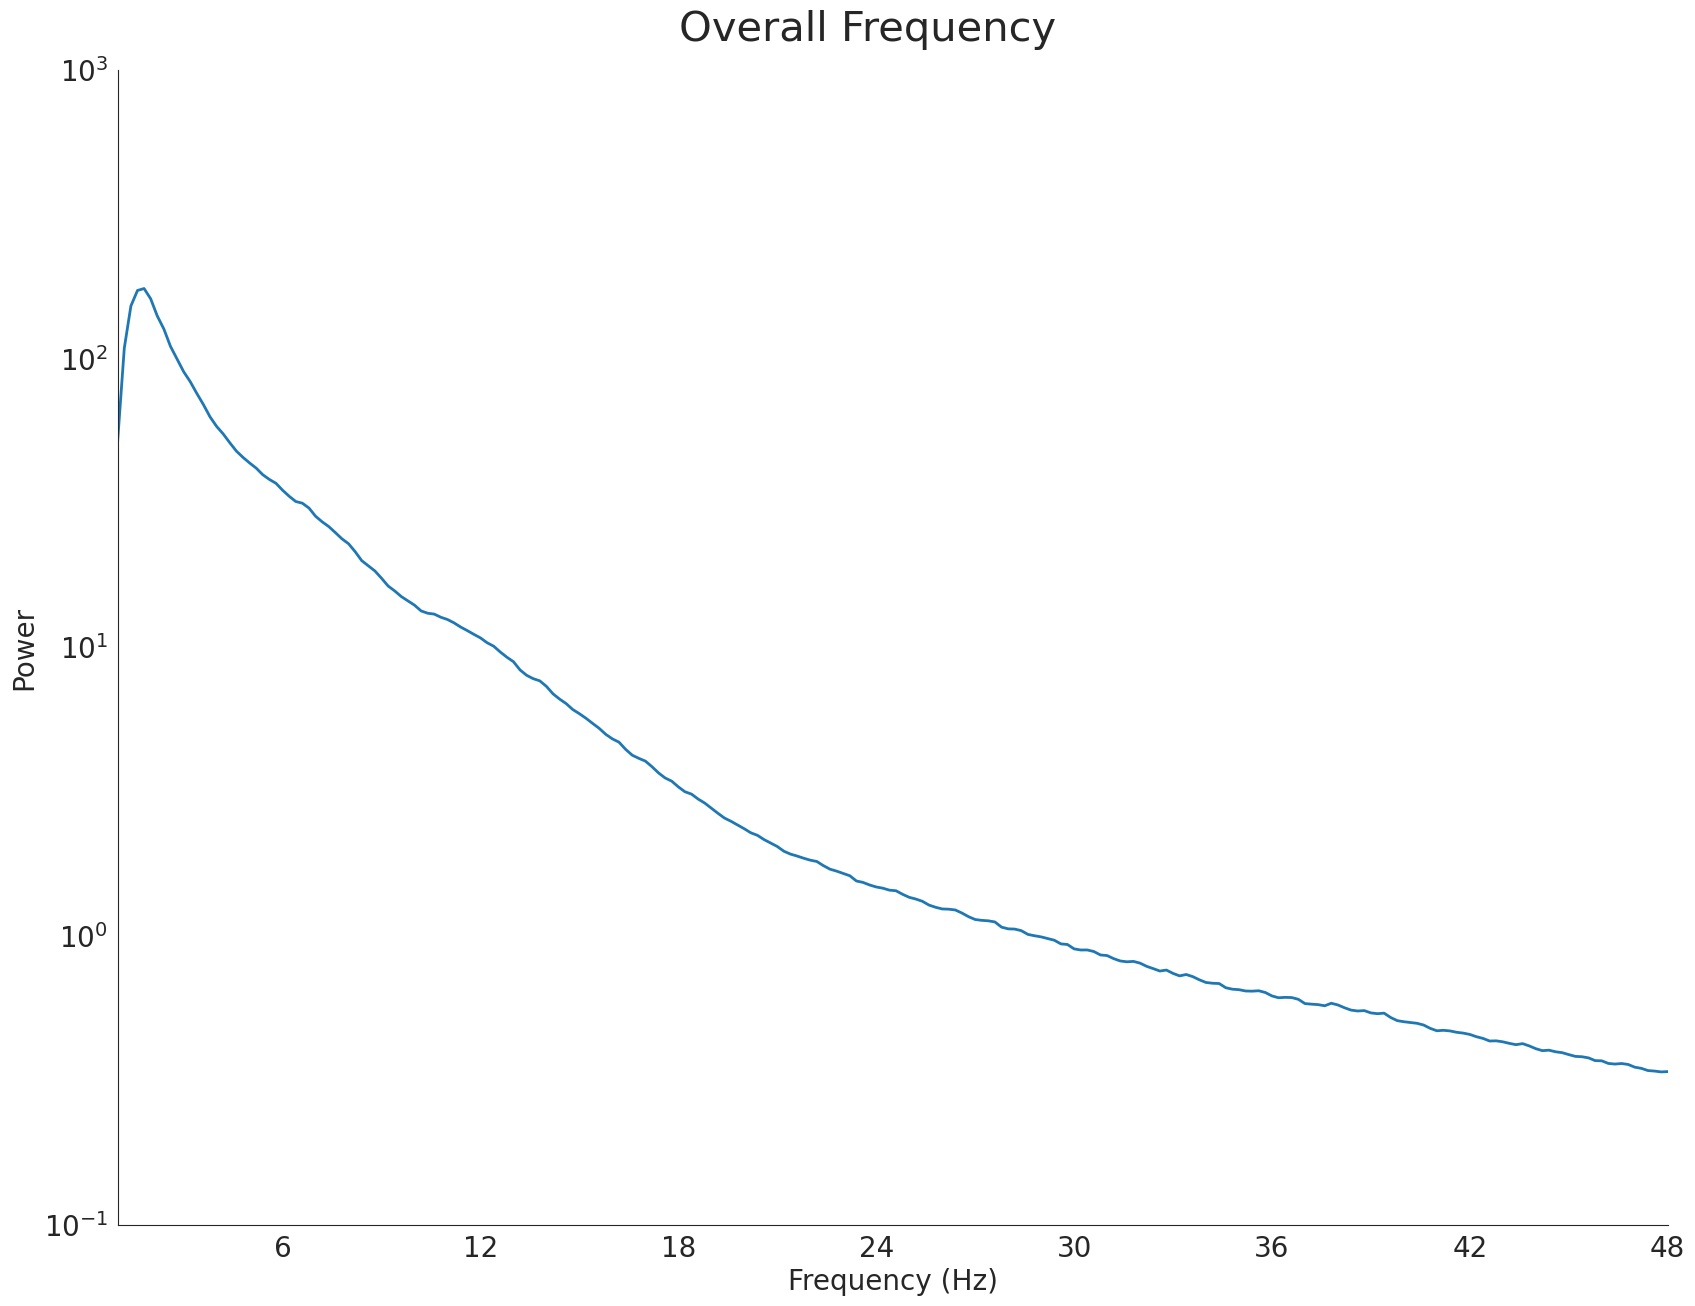

In [62]:
sns.set_style("white") 
fig, axs = plt.subplots(1,1, figsize=(20,15), sharex = True, sharey=True)
sns.lineplot(data= power_df, x='Frequency', y='Power', errorbar = ("se"), linewidth = 2)
axs.set_yscale('log')
tick_values = list(range(0, 54, 6))
label_list = ['0', '6', '12', '18', '24', '30', '36', '42', '48']
axs.set_xticks(ticks = tick_values, labels = label_list)
            
            
#include an overall plot title 
plt.suptitle('Overall Frequency', y = 0.92, fontsize = 30) 
sns.despine()
axs.set_xlim(1, 48)
axs.set_ylim(10**-1, 10**3)
axs.set_xlabel("Frequency (Hz)", fontsize = 20)
#axs.set_ylabel("Power [V**2/Hz]", fontsize = 20)


